In [1]:
# import packages

In [2]:
# read data

## Data overlook

In [3]:
#%matplotlib inline
#!pip install imblearn
#!pip install -U imbalanced-learn
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import time
from pylab import *
#!pip install plotly-express
import plotly.express as px
#!pip install autots
from autots import AutoTS

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.kernel_ridge import KernelRidge

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity='all'

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [5]:
bank = pd.read_csv("bank-additional-full.csv")

In [6]:
bank.info()
print(bank.head())
print(bank.isnull().sum())
bank.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank['campaign'] = bank['campaign'].astype(int)
bank['pdays'] = bank['pdays'].astype(int)
bank['duration'] = bank['duration'].astype(int)
bank['emp.var.rate'] = bank['emp.var.rate'].astype(int)
bank['cons.price.idx'] = bank['cons.price.idx'].astype(int)
bank['cons.conf.idx'] = bank['cons.conf.idx'].astype(int)
bank['cons.price.idx'] = bank['cons.price.idx'].astype(int)

In [8]:
outcome = bank['y']

C:\Users\Angela Chen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


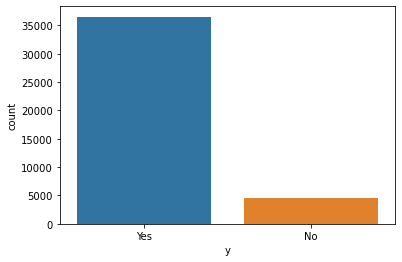

In [9]:
#The dataset is imbalanced
g = sns.countplot(bank['y'])
g.set_xticklabels(['Yes','No'])
plt.show()

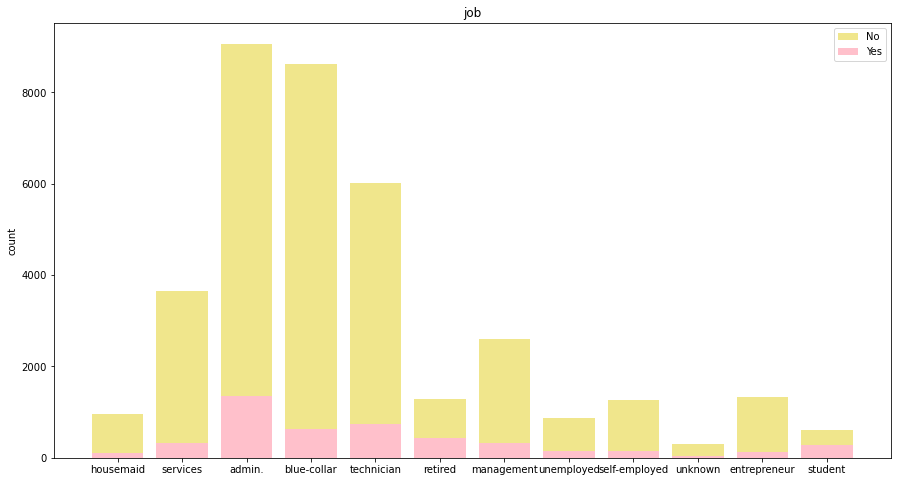

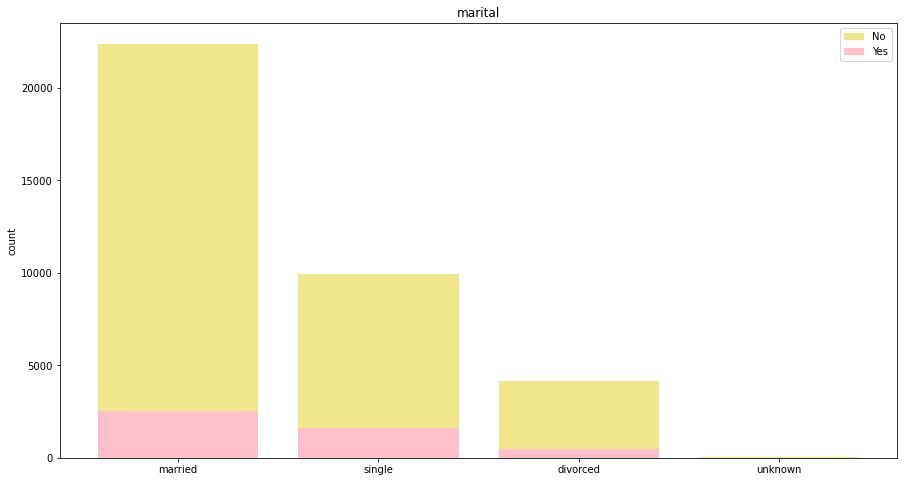

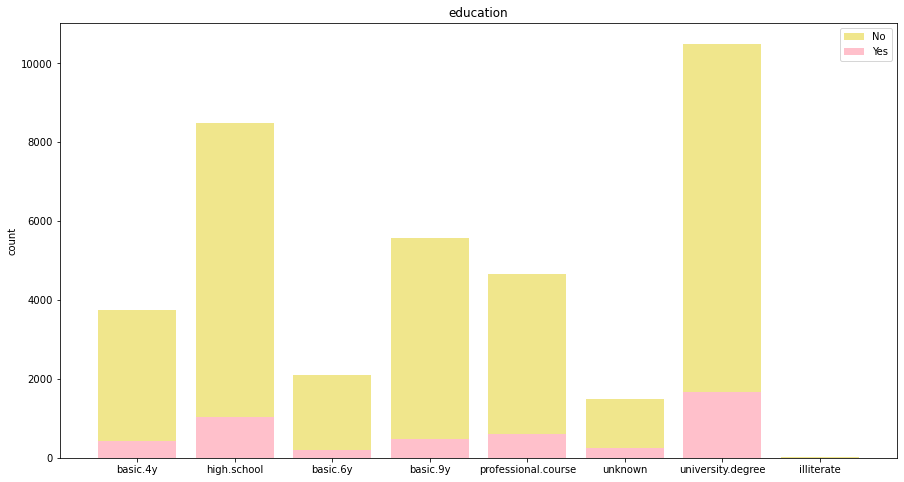

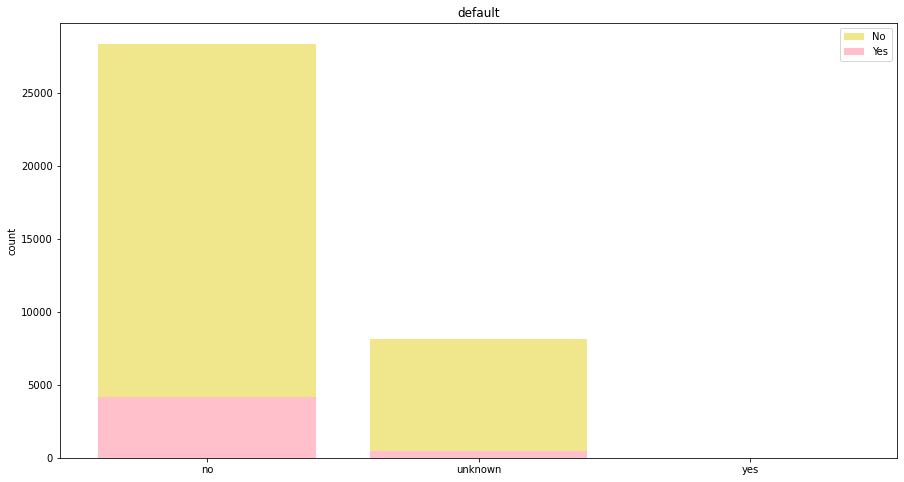

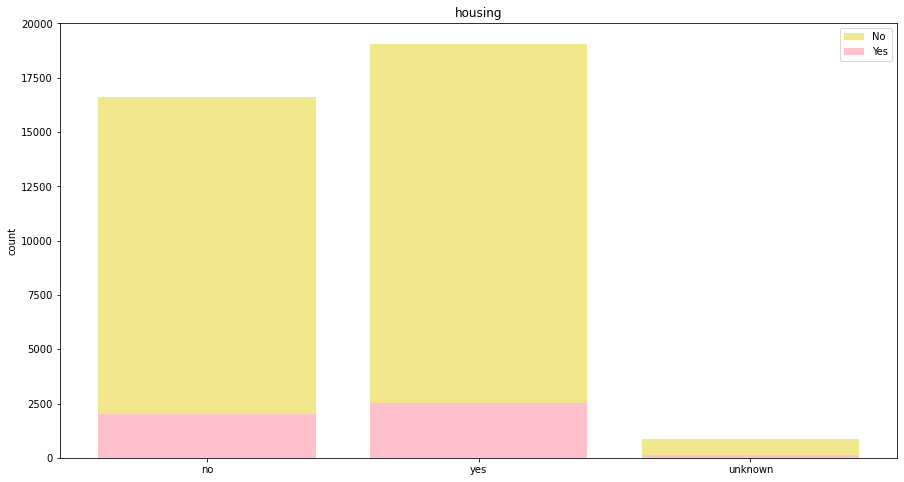

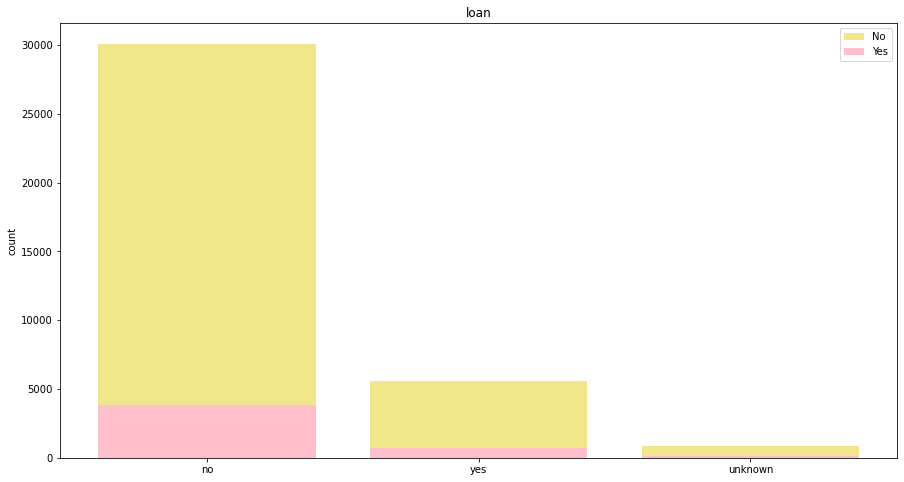

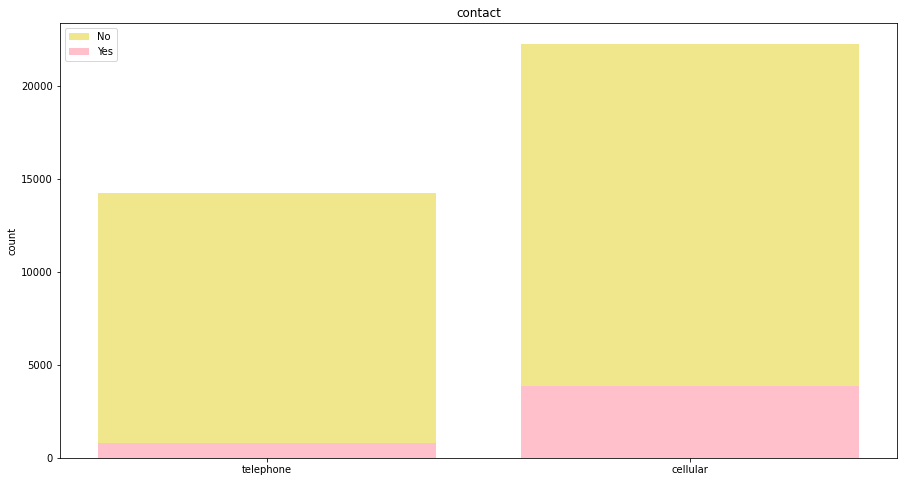

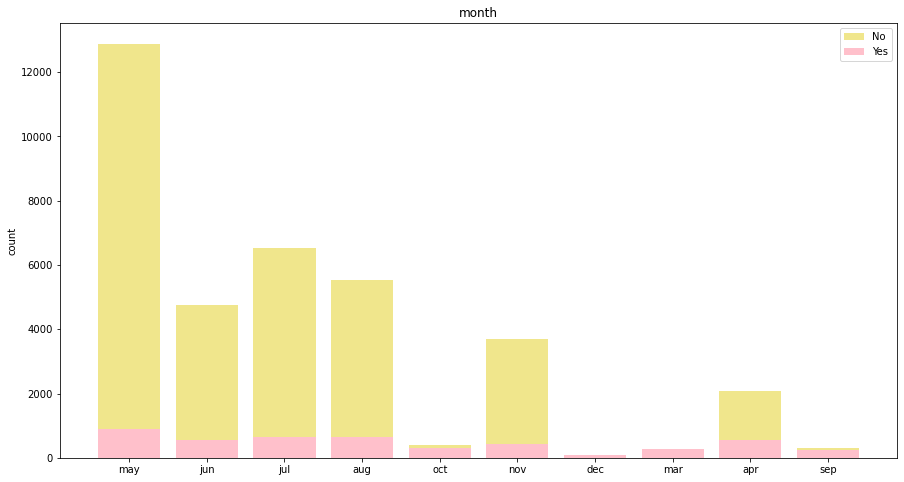

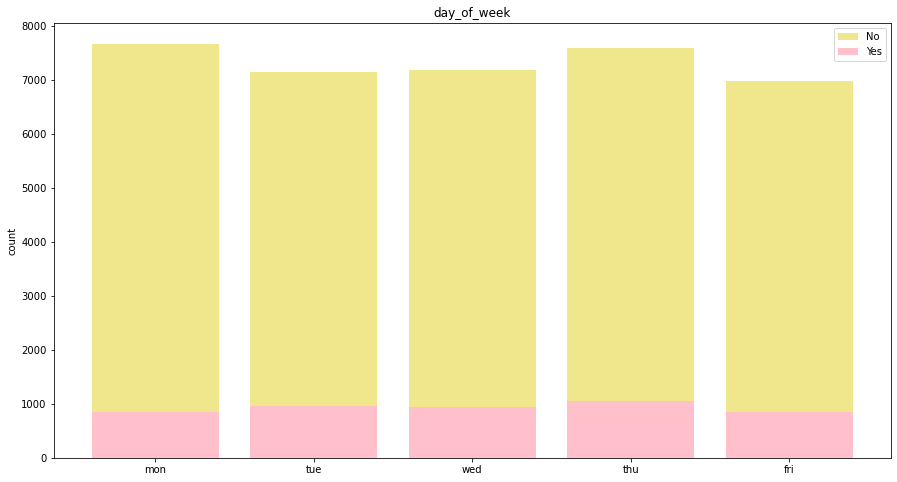

In [10]:
for k in range (1,10):
    no = []
    yes = []
    for i in bank.iloc[:,k].unique():
        newdf = bank.loc[bank.iloc[:,k]==i]    
        no.append((newdf['y']=='no').sum())
        yes.append((newdf['y']=='yes').sum())

    fig, ax = plt.subplots(figsize=(15,8))
    one = ax.bar(bank.iloc[:,k].unique(), no, label='No',color = 'khaki')
    two = ax.bar(bank.iloc[:,k].unique(), yes, label='Yes',color = 'pink')
    ax.set_ylabel('count')
    ax.set_title(bank.columns[k])
    ax.legend()
    plt.show()

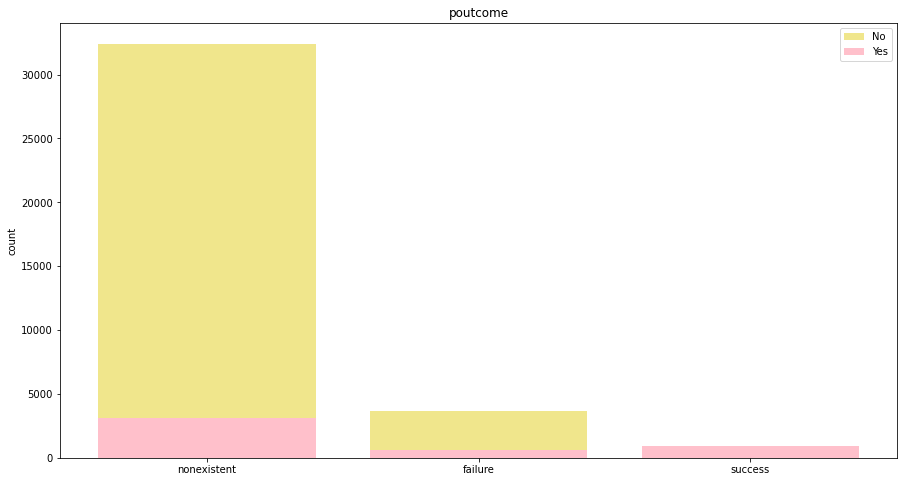

In [11]:
no = []
yes = []
for i in bank.iloc[:,14].unique():
    newdf = bank.loc[bank.iloc[:,14]==i]    
    no.append((newdf['y']=='no').sum())
    yes.append((newdf['y']=='yes').sum())

fig, ax = plt.subplots(figsize=(15,8))
one = ax.bar(bank.iloc[:,14].unique(), no, label='No',color = 'khaki')
two = ax.bar(bank.iloc[:,14].unique(), yes, label='Yes',color = 'pink')
ax.set_ylabel('count')
ax.set_title(bank.columns[14])
ax.legend()
plt.show()

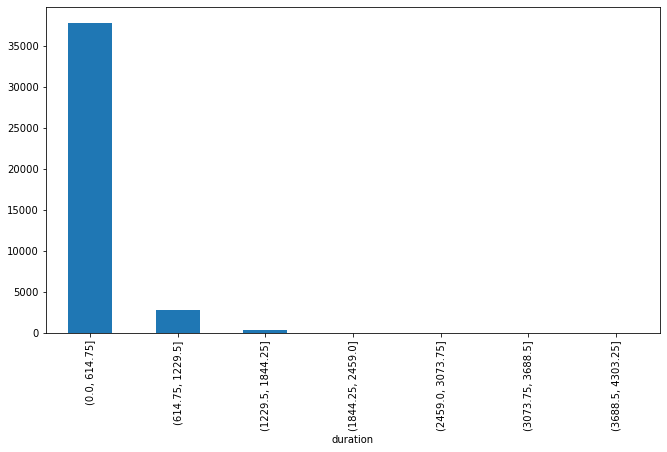

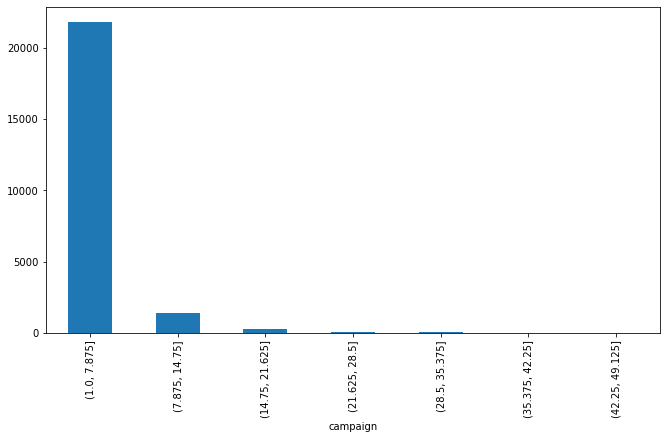

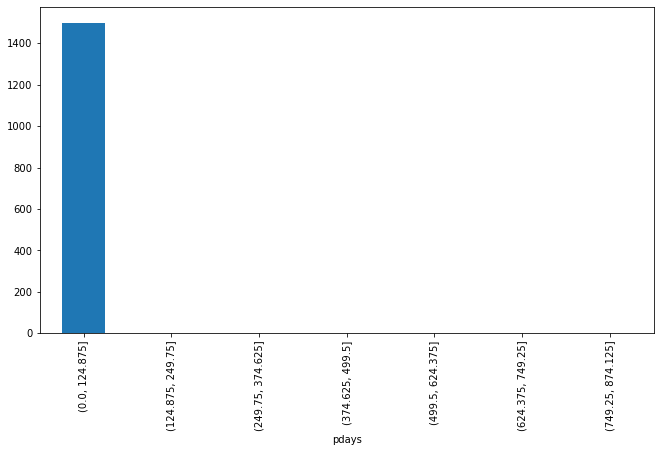

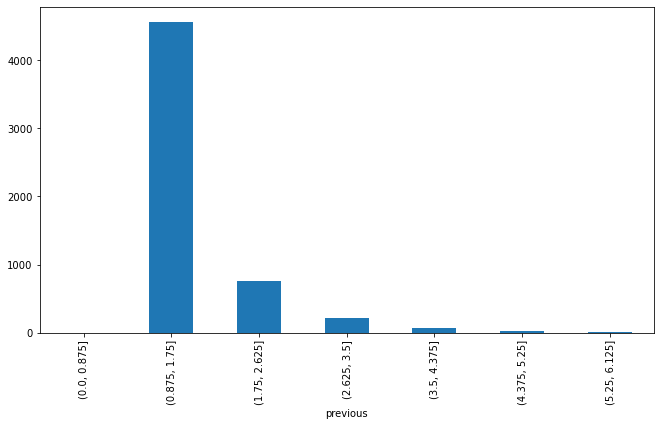

In [12]:
for k in range (10,14):
    no = []
    yes = []
    length = (bank.iloc[:,k].max()-bank.iloc[:,k].min())/8
    bins = np.arange(bank.iloc[:,k].min(),bank.iloc[:,k].max(),length)
    newbins = pd.cut(bank.iloc[:,k],bins)
    y = bank.groupby(newbins)['y'].count()
    fig, ax = plt.subplots(figsize=(11,6))
    y.plot(kind = 'bar')

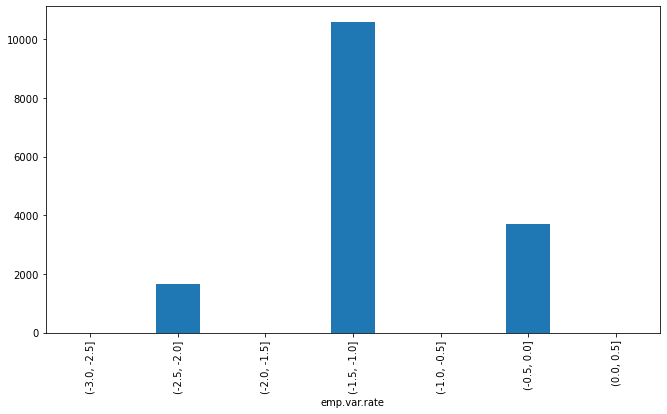

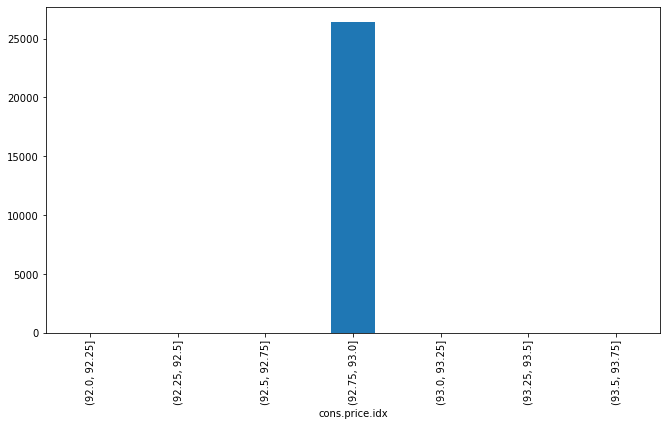

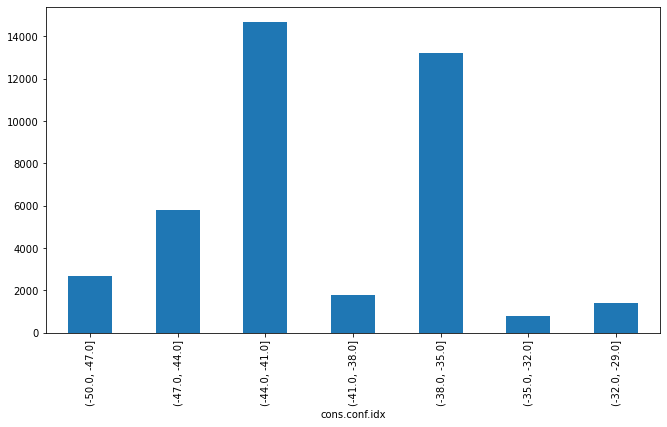

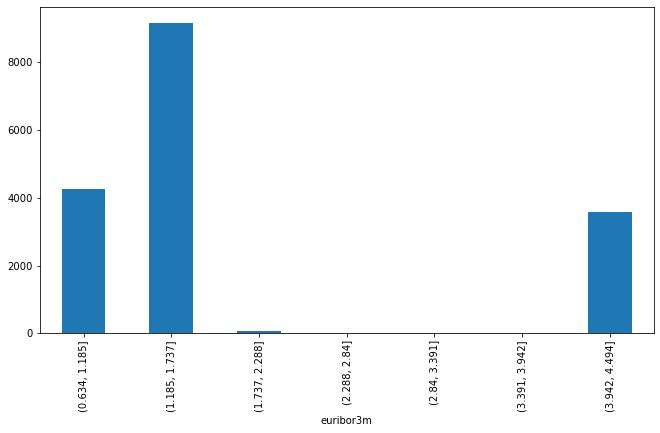

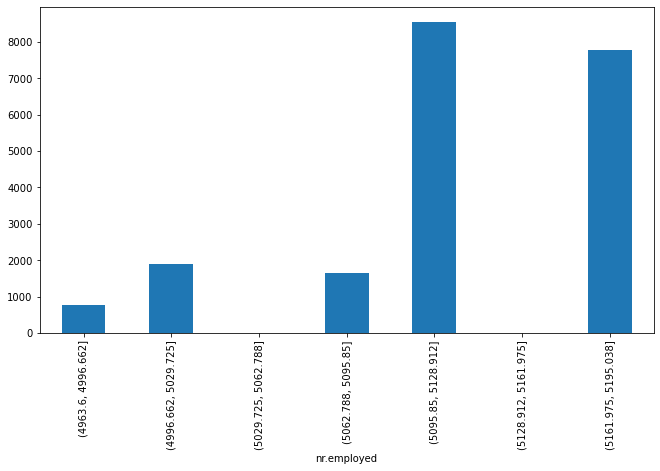

In [13]:
for k in range (15,20):
    no = []
    yes = []
    length = (bank.iloc[:,k].max()-bank.iloc[:,k].min())/8
    bins = np.arange(bank.iloc[:,k].min(),bank.iloc[:,k].max(),length)
    newbins = pd.cut(bank.iloc[:,k],bins)
    y = bank.groupby(newbins)['y'].count()
    fig, ax = plt.subplots(figsize=(11,6))
    y.plot(kind = 'bar')

In [14]:
bank2 = bank.copy()
d = {'no': 0, 'yes': 1}
bank2['y'] = bank2['y'].map(d).fillna(bank2['y'])

<AxesSubplot:>

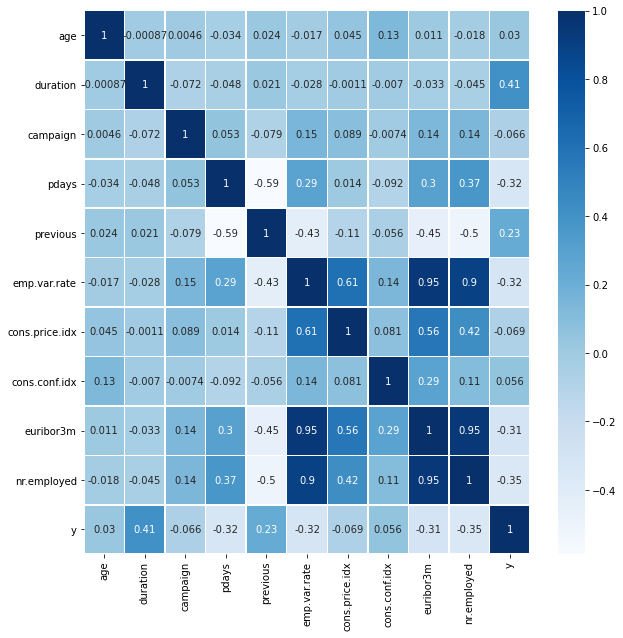

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(bank2.corr(),annot=True,cmap='Blues',linewidths=.5)

In [16]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
box = ['marital','education','default','housing','loan','contact','poutcome']
for i in box:
    print(bank[i].value_counts())

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


In [18]:
#random forest method of handling Na values
# @copyright Zhihui Chen
process_df = bank[['marital','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.marital!='unknown'].values
unknown = process_df[process_df.marital=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.marital == 'unknown'),'marital'] = predicted

In [19]:
process_df = bank[['default','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.default!='unknown'].values
unknown = process_df[process_df.default=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.default == 'unknown'),'default'] = predicted

In [20]:
process_df = bank[['education','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.education!='unknown'].values
unknown = process_df[process_df.education=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.education == 'unknown'),'education'] = predicted

In [21]:
process_df = bank[['loan','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.loan!='unknown'].values
unknown = process_df[process_df.loan=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.loan == 'unknown'),'loan'] = predicted

In [22]:
process_df = bank[['housing','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.housing!='unknown'].values
unknown = process_df[process_df.housing=='unknown'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.housing == 'unknown'),'housing'] = predicted

In [23]:
process_df = bank[['poutcome','age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
known = process_df[process_df.poutcome!='nonexistent'].values
unknown = process_df[process_df.poutcome=='nonexistent'].values
X = known[:,1:]
y = known[:,0]
rfr = RandomForestClassifier(n_estimators=2000,n_jobs = -1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1::])
bank.loc[(bank.poutcome == 'nonexistent'),'poutcome'] = predicted

In [24]:
for i in box:
    print(bank[i].value_counts())

married     24977
single      11591
divorced     4620
Name: marital, dtype: int64
university.degree      12723
high.school             9949
basic.9y                6265
professional.course     5396
basic.4y                4471
basic.6y                2366
illiterate                18
Name: education, dtype: int64
no     41185
yes        3
Name: default, dtype: int64
yes    22125
no     19063
Name: housing, dtype: int64
no     34912
yes     6276
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
failure    39815
success     1373
Name: poutcome, dtype: int64


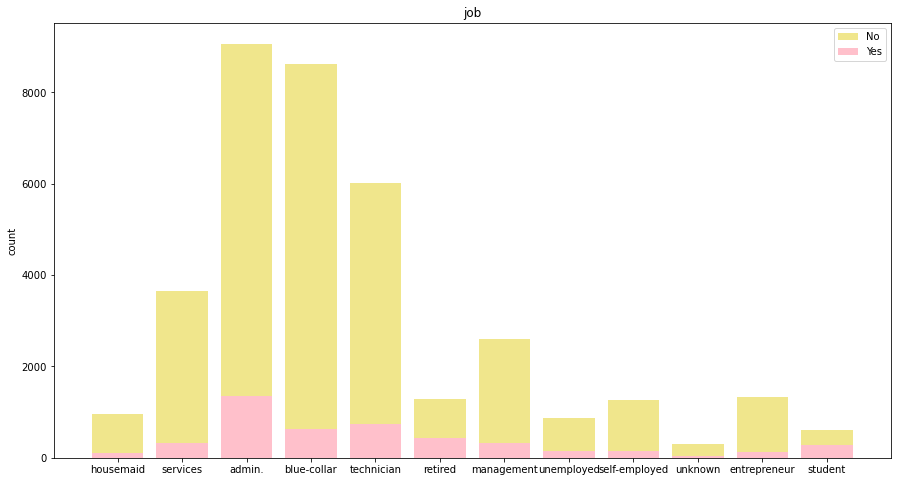

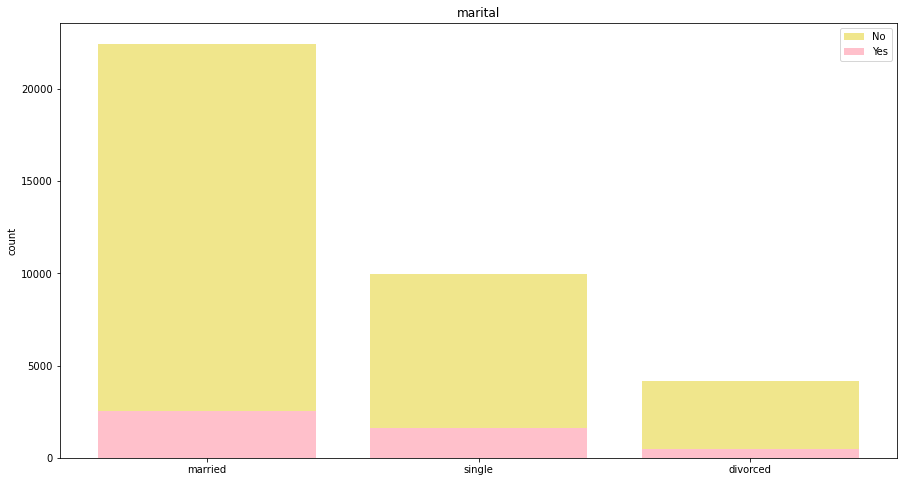

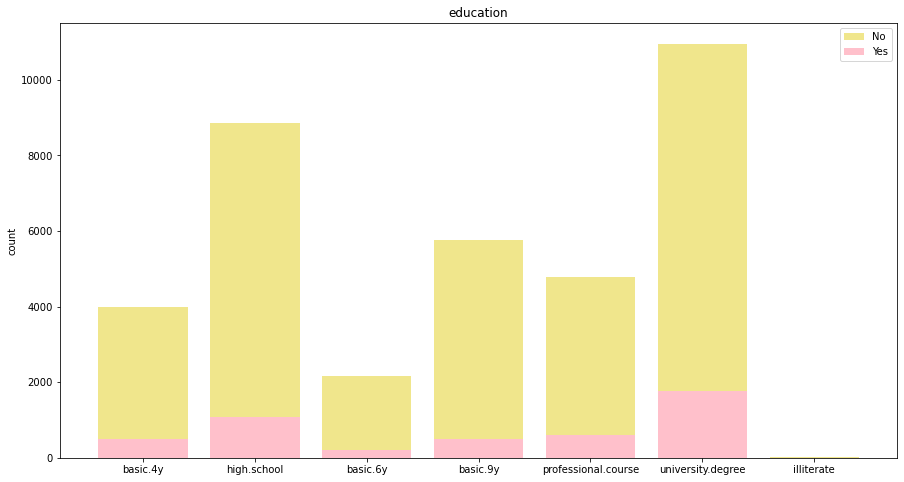

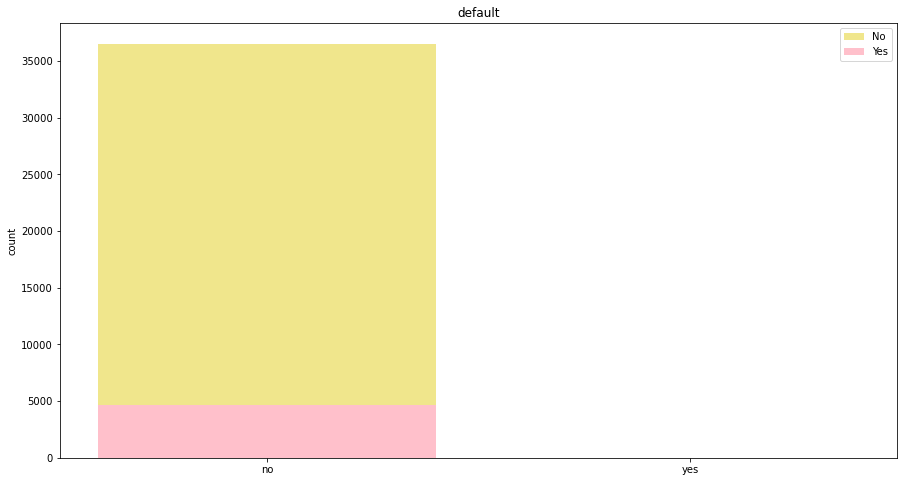

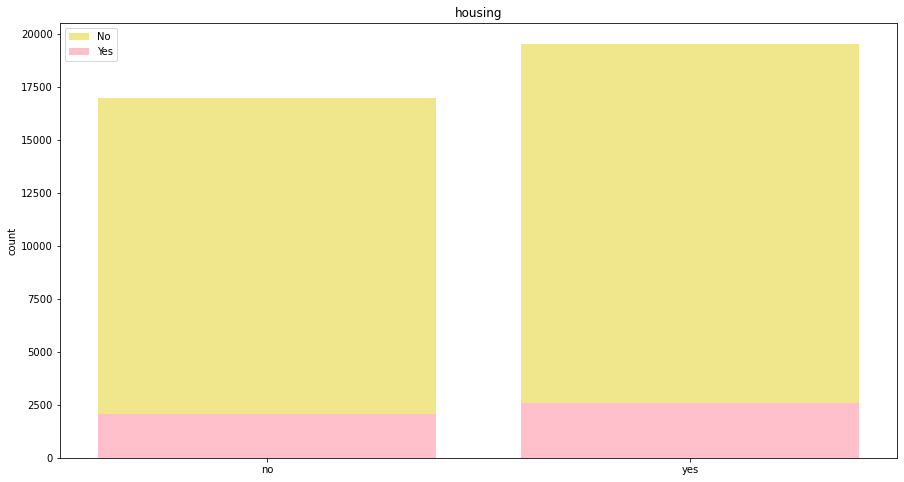

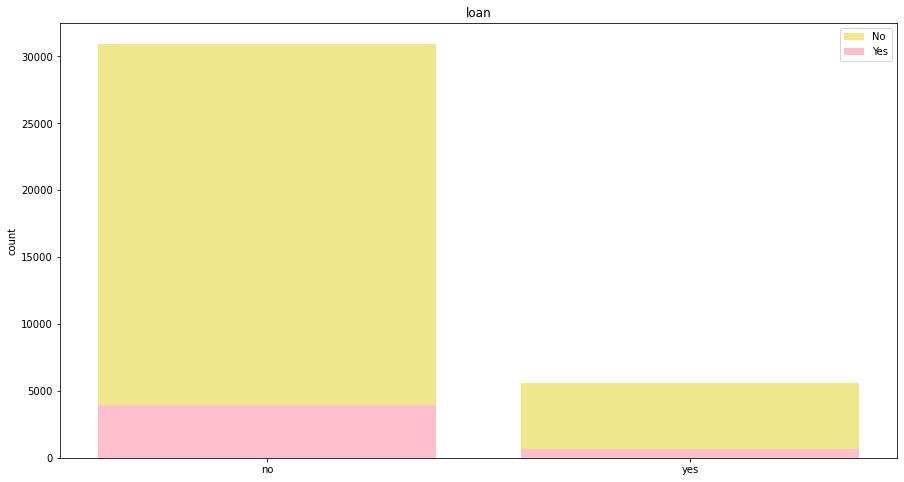

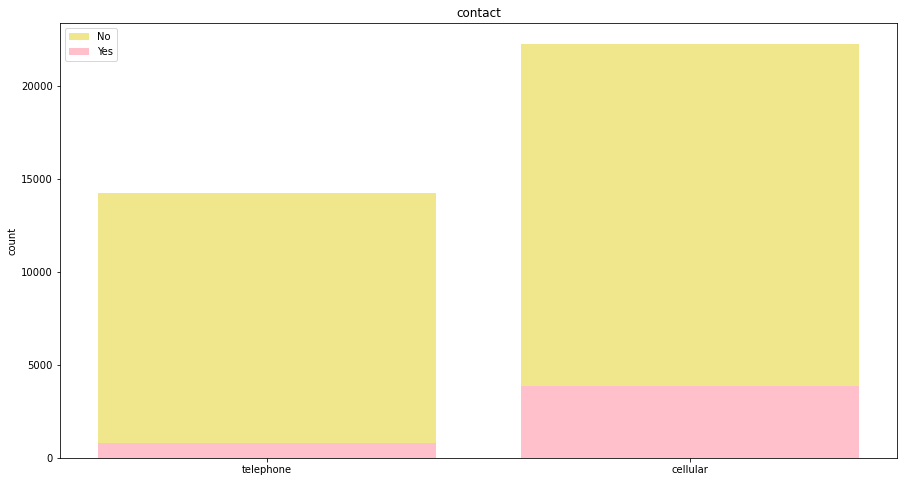

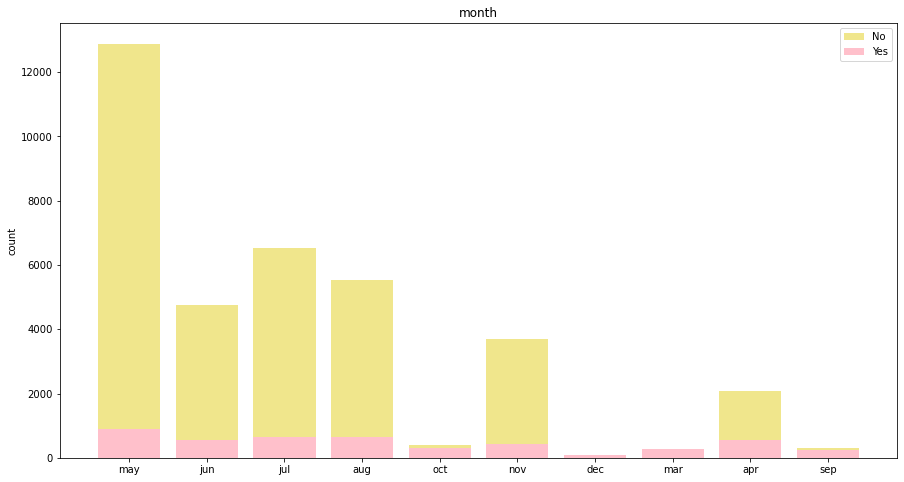

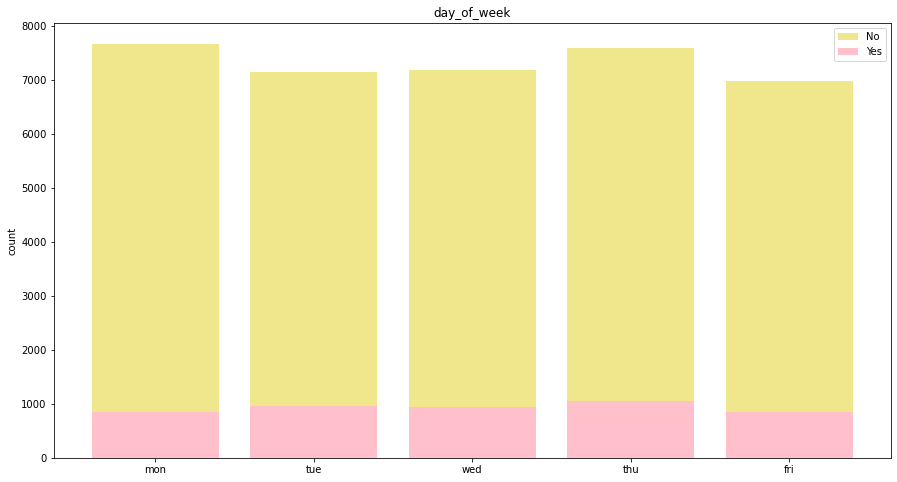

In [25]:
for k in range (1,10):
    no = []
    yes = []
    for i in bank.iloc[:,k].unique():
        newdf = bank.loc[bank.iloc[:,k]==i]    
        no.append((newdf['y']=='no').sum())
        yes.append((newdf['y']=='yes').sum())

    fig, ax = plt.subplots(figsize=(15,8))
    one = ax.bar(bank.iloc[:,k].unique(), no, label='No',color = 'khaki')
    two = ax.bar(bank.iloc[:,k].unique(), yes, label='Yes',color = 'pink')
    ax.set_ylabel('count')
    ax.set_title(bank.columns[k])
    ax.legend()
    plt.show()

In [26]:
#set dummies
predictors = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
banknew = pd.get_dummies(bank[predictors], drop_first=True)
banknew.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Here I used both oversampling and undersampling as two methods to balance the data. In the visualization part, the result od 'No' is far less than 'Yes' and the sample of 'NO' is less than 5000, so in the following model training process I firstly did the undersampling and randomly selected 0.15 of the new data.

In [27]:
#Undersampling
y = banknew['poutcome_success']
X = banknew.drop(columns=['poutcome_success'])
under = RandomUnderSampler(sampling_strategy=1)
X,y = under.fit_resample(X,y)
y = pd.DataFrame(y)
dt1 = pd.concat([X,y],axis=1)
print(dt1.shape)
dt1.describe()

(2746, 33)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
count,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,...,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000
mean,0.156956,0.023671,0.025856,0.070648,0.079024,0.029862,0.075382,0.051712,0.161326,0.034960,...,0.150765,0.017116,0.130007,0.118718,0.034596,0.256737,0.105608,0.054989,0.058995,0.500000
std,0.363825,0.152049,0.158734,0.256283,0.269825,0.170236,0.264055,0.221484,0.367898,0.183712,...,0.357885,0.129727,0.336373,0.323515,0.182787,0.436913,0.307391,0.228000,0.235658,0.500091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Angela Chen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


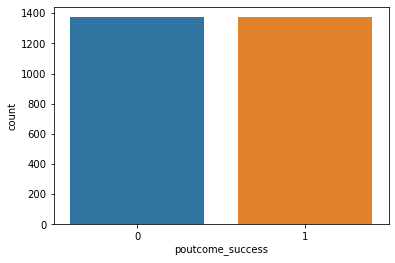

In [28]:
g = sns.countplot(dt1['poutcome_success'])
#g.set_xticklabels(['not have diabetes','Diabetes'])
plt.show()

In [29]:
#Oversampling
y = banknew['poutcome_success']
X = banknew.drop(columns=['poutcome_success'])
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
y = pd.DataFrame(y)
dt = pd.concat([X,y],axis=1)
print(dt.shape)
dt.describe()

(79630, 33)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success
count,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,...,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000,79630.000000
mean,1.248273,0.820897,0.937599,1.260869,1.496245,1.119679,1.604081,1.348449,2.382180,1.632237,...,0.932500,0.904232,0.952267,1.027264,0.933254,0.839910,0.939583,0.725028,0.930742,0.500000
std,13.548338,11.645956,12.543772,14.103527,15.525111,13.655483,16.166697,14.998041,19.292732,16.437235,...,11.541551,12.270974,11.734332,12.544976,12.476964,10.022972,11.926230,10.669613,12.193781,0.500003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,255.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,254.000000,255.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1.000000


#### There are too many data, to run the models with over 70,000 data would be time consuming, then I used the function sample() to randomly select 10% of the generated balanced dataset

In [30]:
dt = dt.sample(frac= 0.1, random_state=8)
print(dt.shape)

(7963, 33)


### Rescaling

In [31]:
target = dt['poutcome_success']
dt.drop(columns='poutcome_success', axis=1, inplace=True)
scale = StandardScaler()
newdata = pd.DataFrame(scale.fit_transform(dt), columns=dt.columns)
newdata.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-0.097281,-0.066835,-0.080219,-0.101201,-0.100682,-0.079161,-0.104388,-0.088383,-0.073997,-0.109307,...,-0.147806,-0.087904,-0.073453,-0.088454,-0.072283,-0.081661,-0.088893,-0.077289,0.019046,-0.075091
1,-0.097281,0.023217,-0.080219,-0.101201,-0.100682,-0.079161,-0.104388,-0.088383,-0.124623,-0.109307,...,-0.147806,-0.087904,-0.073453,-0.018424,-0.072283,-0.081661,-0.088893,-0.077289,-0.072481,-0.075091
2,-0.097281,-0.066835,-0.080219,-0.101201,-0.100682,-0.079161,-0.104388,-0.088383,-0.073997,-0.109307,...,-0.106973,-0.087904,-0.073453,-0.088454,-0.072283,-0.081661,-0.088893,0.009713,-0.072481,-0.075091
3,-0.032097,-0.066835,-0.080219,-0.101201,-0.100682,-0.079161,-0.104388,-0.088383,-0.124623,-0.109307,...,-0.147806,-0.087904,-0.073453,-0.088454,-0.072283,-0.081661,-0.088893,-0.077289,-0.072481,-0.075091
4,-0.097281,-0.066835,-0.080219,-0.034090,-0.100682,-0.079161,-0.104388,-0.088383,-0.124623,-0.109307,...,-0.147806,0.007513,-0.073453,-0.088454,-0.072283,-0.081661,-0.088893,-0.077289,-0.072481,-0.075091


In [32]:
X = newdata.copy()
y = target.copy()
print(X.shape)
print(y.shape)
le = LabelEncoder() 
for col in X.columns:
    X[col] = le.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

(7963, 32)
(7963,)


### PCA components selection

In [33]:
# choose PCA components
df_cov_matrix = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
total = sum(eig_vals)
var_exp = [(i /total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance captured as we travel with each component \n",cum_var_exp)
print("From above results, 29 components could capture 99% of the variance, I will keep 29 components in the following models.")

pca = PCA(n_components = 29)
X = pca.fit_transform(X)
#dfnew = pd.DataFrame(data=pcs, columns={'PC1','PC2','PC3','PC4'})
#dfnew['target'] = y
#dfnew.head()

Cumulative variance captured as we travel with each component 
 [ 35.56996403  51.67481046  63.56118527  72.59607554  77.67921242
  81.37504946  84.07266963  86.62873228  88.36961592  90.02208684
  90.97481476  91.8288987   92.66002759  93.45934868  94.18396812
  94.90343389  95.497817    96.0565679   96.60461913  97.10034348
  97.58432506  98.02678467  98.4604234   98.8632199   99.26216866
  99.50948695  99.6810478   99.82907887  99.95318656  99.9992926
  99.99998729 100.        ]
From above results, 29 components could capture 99% of the variance, I will keep 29 components in the following models.


In [34]:
#Logistic regression
#knn
#Ridge with grid search
#lasso
#Kernel ridge model
#Use grid search to decide the depth of Decision tree
# Linear svm
#forest = RandomForestClassifier()

In [47]:
#a function store models and their scores into a dictionaty
model_score = {}
def getBestScore(model, testSize, nmc):
    if model == 'knn':
        best_nei = 0
        bestscore = 0
        for i in range(20):
            model = KNeighborsClassifier(n_neighbors=i+1)
            shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
            CVInfo = cross_validate(model, X, y, cv=shuffle, return_train_score=True)
            #testscorelist.append(np.mean(CVInfo['test_score']))
            if bestscore < np.mean(CVInfo['test_score']):
                bestscore = np.mean(CVInfo['test_score'])
                trainscore = np.mean(CVInfo['train_score'])
                best_nei = i
        modelnew = KNeighborsClassifier(n_neighbors=best_nei)
        modelnew.fit(X,y)
        #yhat = modelnew.predict(X)
        #cmat = confusion_matrix(y, yhat) 
        print(f'The score for test is {bestscore},with {best_nei} neighbors')
        model_score[model] = trainscore, bestscore
        #print(f'The confusion matrix for this model is {cmat}')
        
    else:
        shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
        CVInfo = cross_validate(model, X, y, cv=shuffle, return_train_score=True)
        trainscore = (np.mean(CVInfo['train_score']))
        testscore = (np.mean(CVInfo['test_score']))
        model_score[model] = trainscore,testscore
        print(f'The score for test is {testscore}')
    return model_score

In [36]:
#Logistic regression
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X,y)
yhat = lr.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
getBestScore(lr, 0.25, 50)

C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

The confusion matrix is [[3609  310]
 [1390 2654]]


C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

The score for test is 0.7835057759919637


C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Angela Chen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

{LogisticRegression(penalty='none'): (0.7873744139316812, 0.7835057759919637)}

In [38]:
#Ridge with grid search
fullModel = Pipeline([("ridge", RidgeClassifier())])
# set up dictionary for grid search
param_grid={'ridge__alpha':[0.1, 0.25, 0.5, 1., 2., 5., 10.,25.,50.,100.,150.,200.]}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(n_splits = 50, test_size=0.25)
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
print(f'The best ridge parameter is {grid_search.best_params_}.')
best_model = grid_search.best_estimator_
yhat = grid_search.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
getBestScore(best_model, 0.25, 50)

The best ridge parameter is {'ridge__alpha': 0.1}.
The confusion matrix is [[3919    0]
 [2273 1771]]
The score for test is 0.7129884480160723


{LogisticRegression(penalty='none'): (0.7873744139316812, 0.7835057759919637),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7150234427327526,
  0.7129884480160723)}

In [39]:
#lasso
fullModel = Pipeline([("lasso", Lasso())])
param_grid={'lasso__alpha':[0.1, 0.25, 0.5, 1., 2., 5., 10.,25.,50.,100.,150.,200.]}
shuffle_split = ShuffleSplit(n_splits = 50, test_size=0.25)
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
print(f'The best ridge parameter is {grid_search.best_params_}.')
best_model = grid_search.best_estimator_
getBestScore(best_model, 0.25, 50)

The best ridge parameter is {'lasso__alpha': 0.1}.
The score for test is 0.1164987414750741


{LogisticRegression(penalty='none'): (0.7873744139316812, 0.7835057759919637),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7150234427327526,
  0.7129884480160723),
 Pipeline(steps=[('lasso', Lasso(alpha=0.1))]): (0.11575970443952267,
  0.1164987414750741)}

In [41]:
#Use grid search to decide the depth of Decision tree
depthlist = [1,2,3,4,5,6,7,8,9,10]
dtr = DecisionTreeClassifier()
param_grid={'max_depth':depthlist}
cvf = ShuffleSplit(test_size=0.25,n_splits=50)
grid_search=GridSearchCV(dtr,param_grid,cv=cvf,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
yhat = grid_search.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
best_model = grid_search.best_estimator_
getBestScore(best_model, 0.25, 50)

The confusion matrix is [[3452  467]
 [ 665 3379]]
The score for test is 0.8272626820693121


{LogisticRegression(penalty='none'): (0.7873744139316812, 0.7835057759919637),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7150234427327526,
  0.7129884480160723),
 Pipeline(steps=[('lasso', Lasso(alpha=0.1))]): (0.11575970443952267,
  0.1164987414750741),
 DecisionTreeClassifier(max_depth=10): (0.8584628265237777,
  0.8272626820693121)}

In [42]:
depthlist = [1,2,3,4,5,6,7,8,9,10]
forest = RandomForestClassifier()
param_grid={'max_depth':depthlist,'n_estimators':[20,40,60,80,100],'max_features': [1,2,3,4]}
cvf = ShuffleSplit(test_size=0.25,n_splits=50)
grid_search=GridSearchCV(forest,param_grid,cv=cvf,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
yhat = grid_search.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
best_model = grid_search.best_estimator_
getBestScore(best_model, 0.25, 50)

The confusion matrix is [[3610  309]
 [ 658 3386]]
The score for test is 0.8482772476142643


{LogisticRegression(penalty='none'): (0.7873744139316812, 0.7835057759919637),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7150234427327526,
  0.7129884480160723),
 Pipeline(steps=[('lasso', Lasso(alpha=0.1))]): (0.11575970443952267,
  0.1164987414750741),
 DecisionTreeClassifier(max_depth=10): (0.8584628265237777,
  0.8272626820693121),
 RandomForestClassifier(max_depth=10, max_features=4): (0.8776959142665774,
  0.8482772476142643)}

In [43]:
# Linear svm
lsv = SVC(kernel="linear",C=1.)
lsv.fit(X,y)
yhat = lsv.predict(X)
cmat = confusion_matrix(y, yhat)
print(f'The confusion matrix is {cmat}')
getBestScore(lsv, 0.25, 50)

The confusion matrix is [[3680  239]
 [1537 2507]]
The score for test is 0.7764942240080361


{LogisticRegression(penalty='none'): (0.7873744139316812, 0.7835057759919637),
 Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]): (0.7150234427327526,
  0.7129884480160723),
 Pipeline(steps=[('lasso', Lasso(alpha=0.1))]): (0.11575970443952267,
  0.1164987414750741),
 DecisionTreeClassifier(max_depth=10): (0.8584628265237777,
  0.8272626820693121),
 RandomForestClassifier(max_depth=10, max_features=4): (0.8776959142665774,
  0.8482772476142643),
 SVC(kernel='linear'): (0.7772572002679169, 0.7764942240080361)}

In [44]:
best_model_all = sorted(model_score.items(),key = lambda x:x[1],reverse = True)[0]
print("Ranking of compute time: ",sorted(model_score.items(),key = lambda x:x[1],reverse = True))
print("\n")
print(f'Best model is {best_model_all}')

Ranking of compute time:  [(RandomForestClassifier(max_depth=10, max_features=4), (0.8776959142665774, 0.8482772476142643)), (DecisionTreeClassifier(max_depth=10), (0.8584628265237777, 0.8272626820693121)), (LogisticRegression(penalty='none'), (0.7873744139316812, 0.7835057759919637)), (SVC(kernel='linear'), (0.7772572002679169, 0.7764942240080361)), (Pipeline(steps=[('ridge', RidgeClassifier(alpha=0.1))]), (0.7150234427327526, 0.7129884480160723)), (Pipeline(steps=[('lasso', Lasso(alpha=0.1))]), (0.11575970443952267, 0.1164987414750741))]


Best model is (RandomForestClassifier(max_depth=10, max_features=4), (0.8776959142665774, 0.8482772476142643))


### New dataset is generated for validation to see whether the model I selected is consistent with a good score all the time

In [45]:
sampler = SMOTEN()
Xnew, ynew = sampler.fit_resample(X, y)

In [46]:
model = best_model_all[0]

shuffle = ShuffleSplit(n_splits=50, test_size=0.25)
CVInfo = cross_validate(model, Xnew, ynew, cv=shuffle, return_train_score=True)
trainscore = (np.mean(CVInfo['train_score']))
testscore = (np.mean(CVInfo['test_score']))
print(f'The average training score for new dataset is {trainscore}')
print(f'The average test score for new dataset is {testscore}')

The average training score for new dataset is 0.8763732278272337
The average test score for new dataset is 0.8490306627101879
